In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

In [6]:
os.getcwd()

'C:\\Users\\manan\\Desktop\\ML\\Data Visualization'

In [7]:
data=pd.read_csv("dataset/P01/EARBUDS/P01_EARBUDS_Final.csv")
data

,Time,PPG_Filtered,PPG_Raw,PPG_Clean,PPG_HR,PPG_Peaks,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,ACC,GYRO,User
0,2021-12-03 16:53:50,1512.211419,1512.211419,1202.862166,50.191657,0.010000,983.44139,55.00126,154.38612,-5058.892717,2633.191240,1093.891112,997.133738,18079.076843,P01
1,2021-12-03 16:53:51,-3619.851591,-3619.851591,702.572941,51.785708,0.010000,983.69515,53.47504,146.38719,5729.185712,989.810939,-830.817819,996.561984,19125.037875,P01
2,2021-12-03 16:53:52,3767.104190,3767.104190,2743.786537,115.073457,0.010000,985.68375,6.24335,97.75250,-5361.232201,-1670.737601,-1889.783455,993.173313,38627.289177,P01
3,2021-12-03 16:53:53,-3390.652899,-3390.652899,444.141668,113.499882,0.020000,996.94923,64.51726,122.45079,6607.349405,8930.385702,2821.878407,1011.426257,56979.147750,P01
4,2021-12-03 16:53:54,3140.449342,3140.449342,1772.273025,68.446946,0.010000,972.89815,8.17522,126.81473,-5899.309046,-9985.703206,402.073468,1040.411775,48782.354970,P01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2021-12-03 17:28:55,-32.402454,-32.402454,276.226143,103.698463,0.010000,197.46737,921.11464,361.14501,3354.244117,-4266.995231,-3974.249288,1026.601886,20572.578390,P01
2106,2021-12-03 17:28:56,71.845218,71.845218,249.335908,68.566845,0.010000,243.36011,886.66672,444.67841,-5137.821958,3750.740062,4702.603079,1042.592533,25709.267149,P01
2107,2021-12-03 17:28:57,-94.990313,-94.990313,91.016310,57.105839,0.010000,225.64144,859.13437,332.75805,6388.845614,-8821.053705,-3361.774132,983.554158,27049.667777,P01
2108,2021-12-03 17:28:58,143.096626,143.096626,197.511520,52.071161,0.010000,85.26641,958.00683,-13.70060,-6592.686311,7008.402376,1799.344042,974.083044,17079.622551,P01


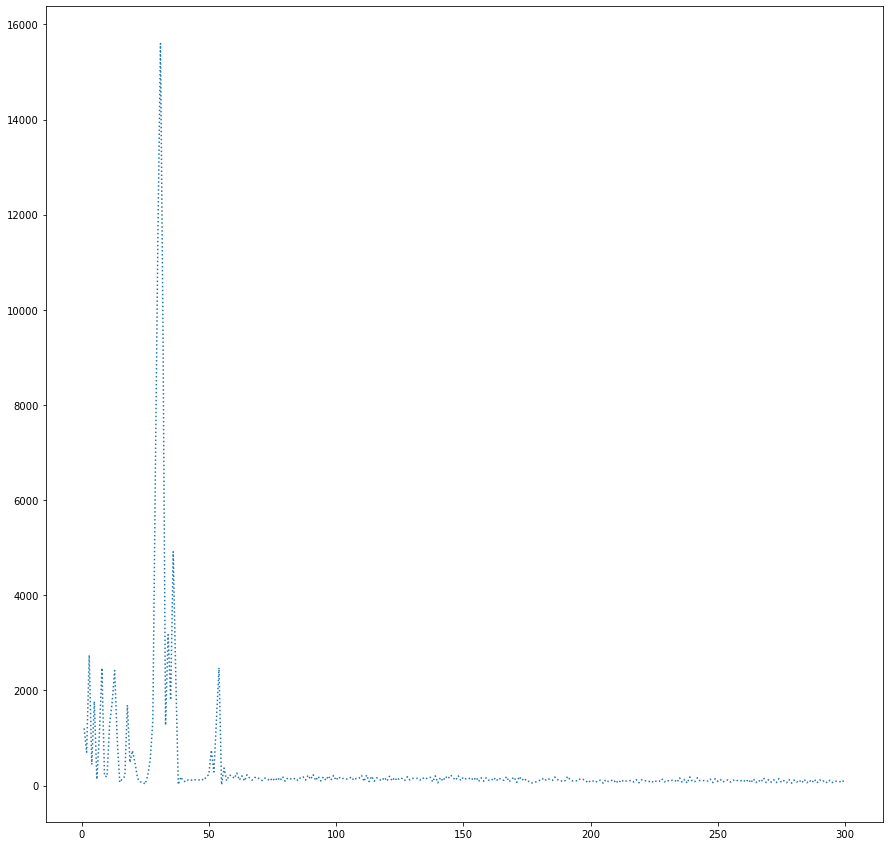

In [8]:
# x_axis=np.arange(1,len(data)+1)
x_axis=np.arange(1,301)

# y_axis=data['PPG_Clean']
y_axis=data['PPG_Clean'].values[:300]
plt.figure(figsize=(15,15))
plt.plot(x_axis,y_axis,linestyle='dotted')
plt.show()

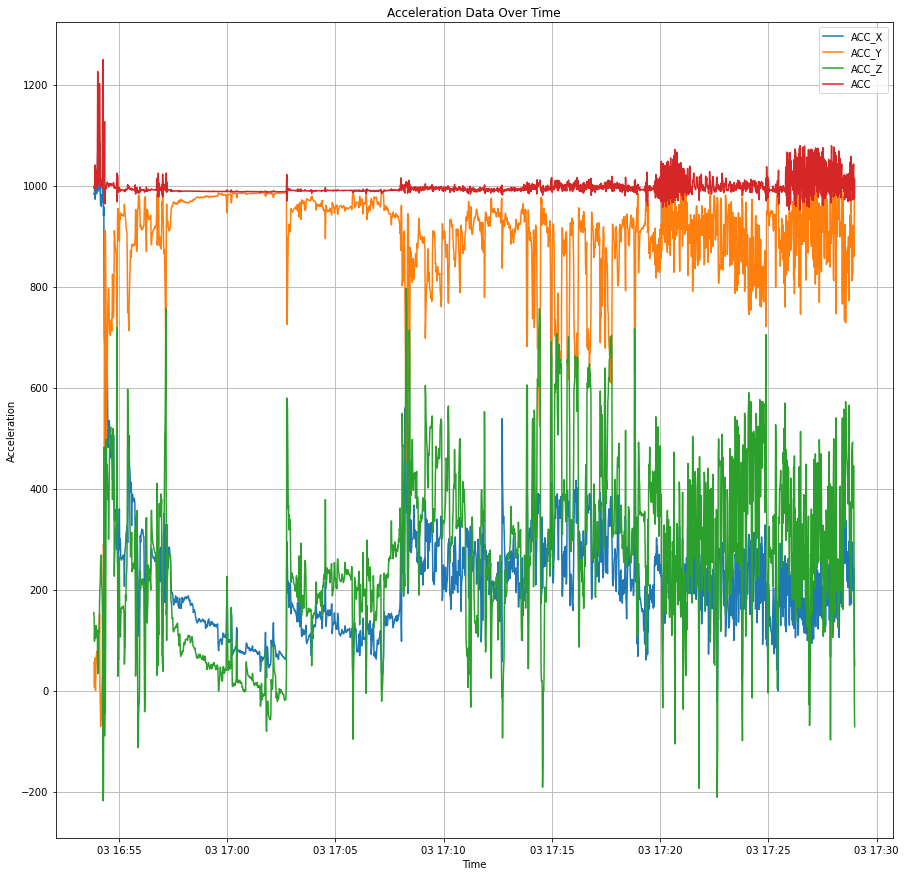

In [9]:
data['Time'] = pd.to_datetime(data['Time'])
plt.figure(figsize=(15, 15))
plt.plot(data['Time'], data['ACC_X'], label='ACC_X')
plt.plot(data['Time'], data['ACC_Y'], label='ACC_Y')
plt.plot(data['Time'], data['ACC_Z'], label='ACC_Z')
plt.plot(data['Time'], data['ACC'], label='ACC')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration Data Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
data2=pd.read_csv("dataset\P03\EARBUDS\P03-imu-right.csv",low_memory=False)
data2

,timestamp,ax,ay,az,gx,gy,gz
0,1637943930384,15618,-709,786,-353,-457,-303
1,1637943930394,16064,-688,857,-1239,-387,-349
2,1637943930403,15949,-792,850,-1793,-977,57
3,1637943930413,15753,-978,805,-1827,-2188,856
4,1637943930422,16031,-1090,838,-1366,-2903,1220
...,...,...,...,...,...,...,...
235466,1637944326335,-6723,14776,-1747,184,-737,47
235467,1637944326345,-6719,14754,-1756,190,-705,72
235468,1637944326354,-6709,14744,-1767,197,-673,95
235469,1637944326364,-6699,14720,-1764,204,-638,116


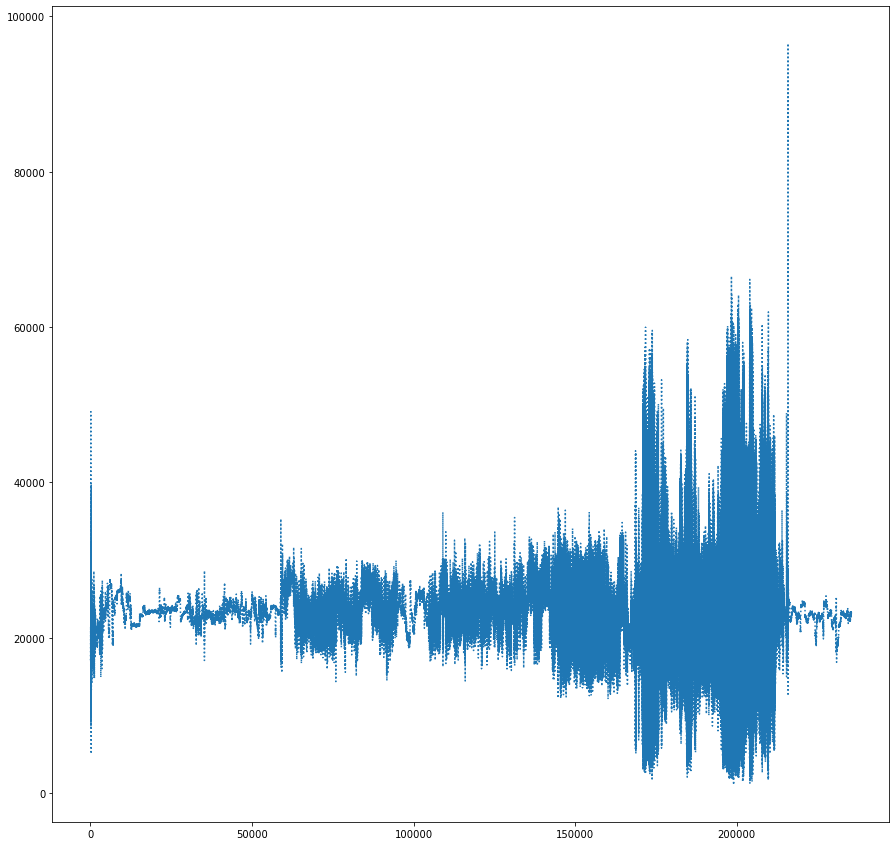

In [11]:
n=0
x_axis=np.arange(n+1,len(data2)+1)
y_axis=abs(data2['ax'].values[n:])+abs(data2['ay'].values[n:])+abs(data2['az'].values[n:])
plt.figure(figsize=(15,15))
plt.plot(x_axis,y_axis,linestyle='dotted')
plt.show()

In [12]:
new_data=data[['ACC_X','ACC_Y','ACC_Z']]
new_data

,ACC_X,ACC_Y,ACC_Z
0,983.44139,55.00126,154.38612
1,983.69515,53.47504,146.38719
2,985.68375,6.24335,97.75250
3,996.94923,64.51726,122.45079
4,972.89815,8.17522,126.81473
...,...,...,...
2105,197.46737,921.11464,361.14501
2106,243.36011,886.66672,444.67841
2107,225.64144,859.13437,332.75805
2108,85.26641,958.00683,-13.70060


In [13]:
data

,Time,PPG_Filtered,PPG_Raw,PPG_Clean,PPG_HR,PPG_Peaks,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,ACC,GYRO,User
0,2021-12-03 16:53:50,1512.211419,1512.211419,1202.862166,50.191657,0.010000,983.44139,55.00126,154.38612,-5058.892717,2633.191240,1093.891112,997.133738,18079.076843,P01
1,2021-12-03 16:53:51,-3619.851591,-3619.851591,702.572941,51.785708,0.010000,983.69515,53.47504,146.38719,5729.185712,989.810939,-830.817819,996.561984,19125.037875,P01
2,2021-12-03 16:53:52,3767.104190,3767.104190,2743.786537,115.073457,0.010000,985.68375,6.24335,97.75250,-5361.232201,-1670.737601,-1889.783455,993.173313,38627.289177,P01
3,2021-12-03 16:53:53,-3390.652899,-3390.652899,444.141668,113.499882,0.020000,996.94923,64.51726,122.45079,6607.349405,8930.385702,2821.878407,1011.426257,56979.147750,P01
4,2021-12-03 16:53:54,3140.449342,3140.449342,1772.273025,68.446946,0.010000,972.89815,8.17522,126.81473,-5899.309046,-9985.703206,402.073468,1040.411775,48782.354970,P01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2021-12-03 17:28:55,-32.402454,-32.402454,276.226143,103.698463,0.010000,197.46737,921.11464,361.14501,3354.244117,-4266.995231,-3974.249288,1026.601886,20572.578390,P01
2106,2021-12-03 17:28:56,71.845218,71.845218,249.335908,68.566845,0.010000,243.36011,886.66672,444.67841,-5137.821958,3750.740062,4702.603079,1042.592533,25709.267149,P01
2107,2021-12-03 17:28:57,-94.990313,-94.990313,91.016310,57.105839,0.010000,225.64144,859.13437,332.75805,6388.845614,-8821.053705,-3361.774132,983.554158,27049.667777,P01
2108,2021-12-03 17:28:58,143.096626,143.096626,197.511520,52.071161,0.010000,85.26641,958.00683,-13.70060,-6592.686311,7008.402376,1799.344042,974.083044,17079.622551,P01


In [14]:
data=pd.read_csv("dataset\P01\EARBUDS\P01_EARBUDS_Final.csv")
data

,Time,PPG_Filtered,PPG_Raw,PPG_Clean,PPG_HR,PPG_Peaks,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,ACC,GYRO,User
0,2021-12-03 16:53:50,1512.211419,1512.211419,1202.862166,50.191657,0.010000,983.44139,55.00126,154.38612,-5058.892717,2633.191240,1093.891112,997.133738,18079.076843,P01
1,2021-12-03 16:53:51,-3619.851591,-3619.851591,702.572941,51.785708,0.010000,983.69515,53.47504,146.38719,5729.185712,989.810939,-830.817819,996.561984,19125.037875,P01
2,2021-12-03 16:53:52,3767.104190,3767.104190,2743.786537,115.073457,0.010000,985.68375,6.24335,97.75250,-5361.232201,-1670.737601,-1889.783455,993.173313,38627.289177,P01
3,2021-12-03 16:53:53,-3390.652899,-3390.652899,444.141668,113.499882,0.020000,996.94923,64.51726,122.45079,6607.349405,8930.385702,2821.878407,1011.426257,56979.147750,P01
4,2021-12-03 16:53:54,3140.449342,3140.449342,1772.273025,68.446946,0.010000,972.89815,8.17522,126.81473,-5899.309046,-9985.703206,402.073468,1040.411775,48782.354970,P01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2021-12-03 17:28:55,-32.402454,-32.402454,276.226143,103.698463,0.010000,197.46737,921.11464,361.14501,3354.244117,-4266.995231,-3974.249288,1026.601886,20572.578390,P01
2106,2021-12-03 17:28:56,71.845218,71.845218,249.335908,68.566845,0.010000,243.36011,886.66672,444.67841,-5137.821958,3750.740062,4702.603079,1042.592533,25709.267149,P01
2107,2021-12-03 17:28:57,-94.990313,-94.990313,91.016310,57.105839,0.010000,225.64144,859.13437,332.75805,6388.845614,-8821.053705,-3361.774132,983.554158,27049.667777,P01
2108,2021-12-03 17:28:58,143.096626,143.096626,197.511520,52.071161,0.010000,85.26641,958.00683,-13.70060,-6592.686311,7008.402376,1799.344042,974.083044,17079.622551,P01


In [15]:
cols = ['ACC_X','ACC_Y','ACC_Z']
d = data[cols].loc[250:]
d

,ACC_X,ACC_Y,ACC_Z
250,181.05349,967.63934,94.97639
251,178.83858,968.08525,94.92149
252,184.40605,967.18672,90.93758
253,182.65291,967.15134,94.81718
254,183.42578,966.41446,101.07090
...,...,...,...
2105,197.46737,921.11464,361.14501
2106,243.36011,886.66672,444.67841
2107,225.64144,859.13437,332.75805
2108,85.26641,958.00683,-13.70060


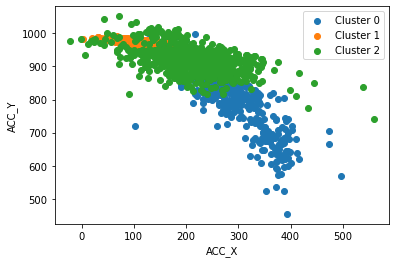

In [16]:

scaler = StandardScaler()
d_std = scaler.fit_transform(d)
gmm = GaussianMixture(n_components=3, random_state=0)
labels = gmm.fit_predict(d_std)
d['Cluster'] = labels
for cluster in range(3):
    cluster_data = d[d['Cluster'] == cluster]
    plt.scatter(cluster_data['ACC_X'], cluster_data['ACC_Y'], label=f'Cluster {cluster}')

plt.xlabel('ACC_X')
plt.ylabel('ACC_Y')
plt.legend()
plt.show()


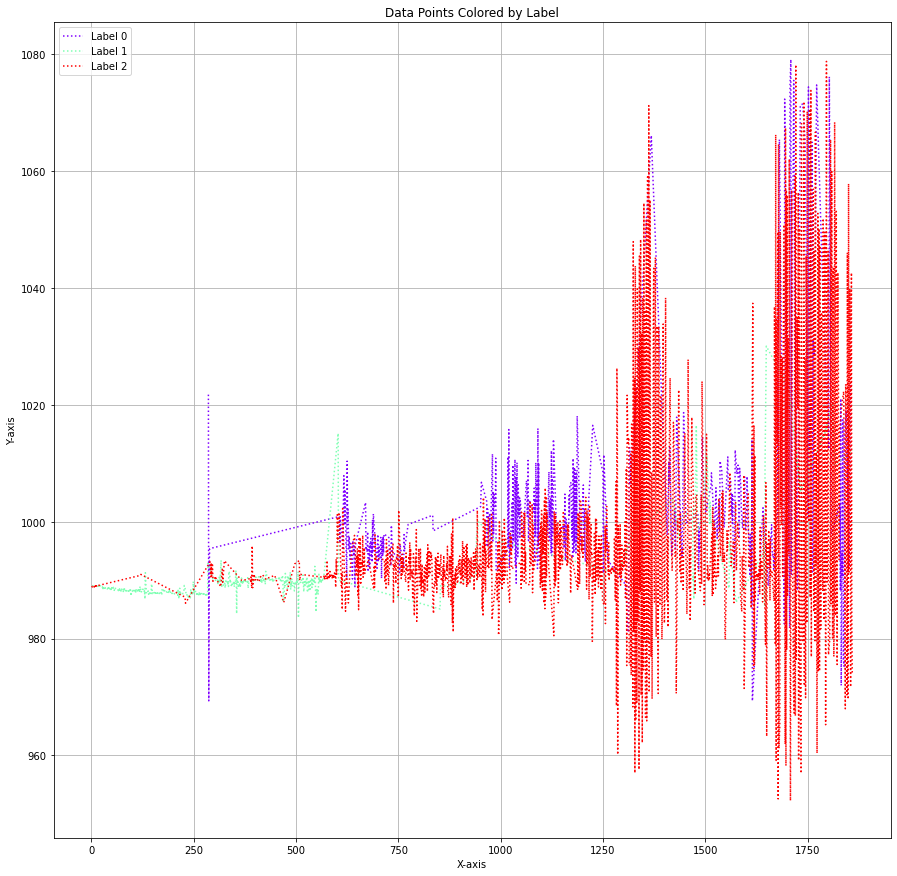

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x_axis = np.arange(1, len(d) + 1)
y_axis = data['ACC'].loc[250:]
labels = d['Cluster'].values 
unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(15, 15))

# Plot data points for each unique label with a different color
for i, label in enumerate(unique_labels):
    mask = (labels == label)
    plt.plot(x_axis[mask], y_axis[mask], linestyle='dotted', label=f'Label {label}', color=colors[i])

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Points Colored by Label')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import copy

In [19]:
data3=copy.deepcopy(data.loc[250:])
data3

,Time,PPG_Filtered,PPG_Raw,PPG_Clean,PPG_HR,PPG_Peaks,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,ACC,GYRO,User
250,2021-12-03 16:58:00,70.820782,70.820782,129.154431,81.990474,0.020000,181.05349,967.63934,94.97639,-64.909892,87.841091,118.207818,989.007722,432.843261,P01
251,2021-12-03 16:58:01,-34.385185,-34.385185,74.814729,88.498273,0.010000,178.83858,968.08525,94.92149,8.123111,-59.553885,-86.847028,989.035196,436.083991,P01
252,2021-12-03 16:58:02,19.540742,19.540742,102.445351,86.345506,0.010000,184.40605,967.18672,90.93758,59.353073,-4.932759,51.443297,988.803797,402.941185,P01
253,2021-12-03 16:58:03,7.426410,7.426410,121.815784,83.763972,0.020000,182.65291,967.15134,94.81718,-81.948633,80.387528,-162.619342,988.812402,455.810647,P01
254,2021-12-03 16:58:04,-25.206372,-25.206372,74.369973,87.299431,0.010000,183.42578,966.41446,101.07090,128.408584,-7.362980,289.340913,988.858840,676.904714,P01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2021-12-03 17:28:55,-32.402454,-32.402454,276.226143,103.698463,0.010000,197.46737,921.11464,361.14501,3354.244117,-4266.995231,-3974.249288,1026.601886,20572.578390,P01
2106,2021-12-03 17:28:56,71.845218,71.845218,249.335908,68.566845,0.010000,243.36011,886.66672,444.67841,-5137.821958,3750.740062,4702.603079,1042.592533,25709.267149,P01
2107,2021-12-03 17:28:57,-94.990313,-94.990313,91.016310,57.105839,0.010000,225.64144,859.13437,332.75805,6388.845614,-8821.053705,-3361.774132,983.554158,27049.667777,P01
2108,2021-12-03 17:28:58,143.096626,143.096626,197.511520,52.071161,0.010000,85.26641,958.00683,-13.70060,-6592.686311,7008.402376,1799.344042,974.083044,17079.622551,P01


In [20]:
data3=data3.drop(['Time'],axis=1)
data3=data3.drop(['User'],axis=1)
data3

,PPG_Filtered,PPG_Raw,PPG_Clean,PPG_HR,PPG_Peaks,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,ACC,GYRO
250,70.820782,70.820782,129.154431,81.990474,0.020000,181.05349,967.63934,94.97639,-64.909892,87.841091,118.207818,989.007722,432.843261
251,-34.385185,-34.385185,74.814729,88.498273,0.010000,178.83858,968.08525,94.92149,8.123111,-59.553885,-86.847028,989.035196,436.083991
252,19.540742,19.540742,102.445351,86.345506,0.010000,184.40605,967.18672,90.93758,59.353073,-4.932759,51.443297,988.803797,402.941185
253,7.426410,7.426410,121.815784,83.763972,0.020000,182.65291,967.15134,94.81718,-81.948633,80.387528,-162.619342,988.812402,455.810647
254,-25.206372,-25.206372,74.369973,87.299431,0.010000,183.42578,966.41446,101.07090,128.408584,-7.362980,289.340913,988.858840,676.904714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,-32.402454,-32.402454,276.226143,103.698463,0.010000,197.46737,921.11464,361.14501,3354.244117,-4266.995231,-3974.249288,1026.601886,20572.578390
2106,71.845218,71.845218,249.335908,68.566845,0.010000,243.36011,886.66672,444.67841,-5137.821958,3750.740062,4702.603079,1042.592533,25709.267149
2107,-94.990313,-94.990313,91.016310,57.105839,0.010000,225.64144,859.13437,332.75805,6388.845614,-8821.053705,-3361.774132,983.554158,27049.667777
2108,143.096626,143.096626,197.511520,52.071161,0.010000,85.26641,958.00683,-13.70060,-6592.686311,7008.402376,1799.344042,974.083044,17079.622551


In [21]:
pca = PCA(n_components=2) 
X=data3.values
X_pca = pca.fit_transform(X)
X_pca

array([[-11100.96885236,   -135.86346576],
       [-11097.07568209,     98.40653546],
       [-11130.75032935,     31.35908673],
       ...,
       [ 15519.95115433,  10998.40950558],
       [  5545.87176776,  -9310.67875581],
       [  7508.38142128,   4257.85038129]])

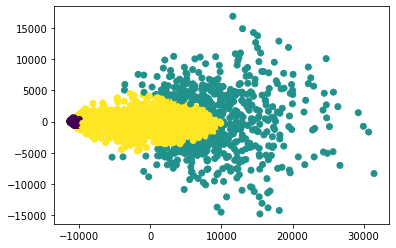

In [22]:
from sklearn.mixture import GaussianMixture

# Specify the number of clusters you want
n_clusters = 3
# Create the GMM model
gmm = GaussianMixture(n_components=n_clusters, random_state=0)

# Fit the model to your PCA-transformed data
gmm.fit(X_pca)

# Predict the cluster labels for each data point
labels = gmm.predict(X_pca)

# Visualize the clusters (assuming you have matplotlib)
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

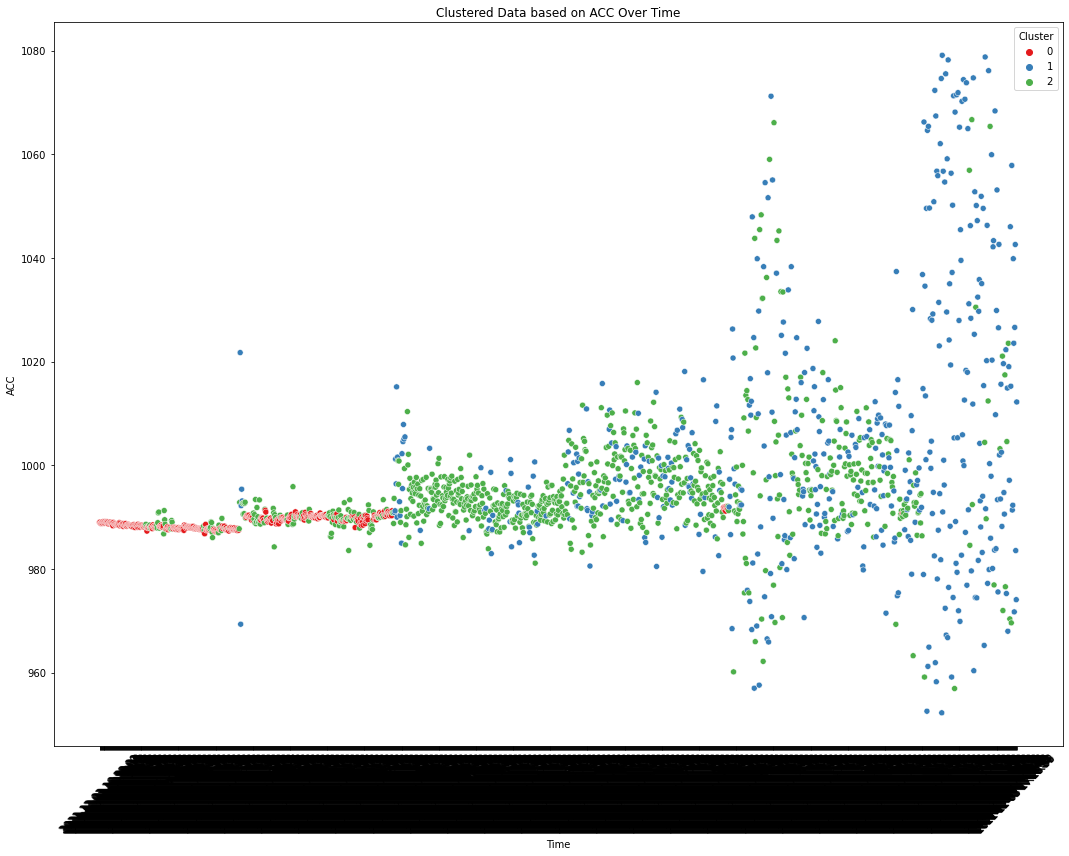

In [23]:
# Create a new DataFrame with the cluster labels
data_with_labels = data.loc[250:].copy()
data_with_labels['Cluster'] = labels

# Plot the data points with colors based on cluster labels
plt.figure(figsize=(15, 12))
sns.scatterplot(x='Time', y='ACC', hue='Cluster', data=data_with_labels, palette='Set1', legend='full')
plt.xlabel('Time')
plt.ylabel('ACC')
plt.title('Clustered Data based on ACC Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


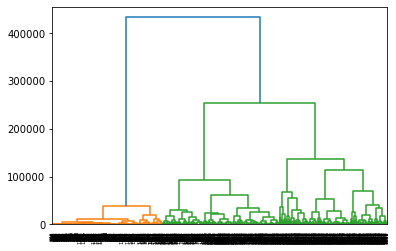

In [24]:
import scipy.cluster.hierarchy as sch

# Calculate the linkage matrix
linkage_matrix = sch.linkage(X_pca, method='ward')  # You can choose a different linkage method if needed

# Perform hierarchical clustering
dendrogram = sch.dendrogram(linkage_matrix)

# Plot the dendrogram
import matplotlib.pyplot as plt
plt.show()


In [25]:
from scipy.cluster.hierarchy import fcluster
num_clusters = 3  # Adjust as needed
cluster_labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

In [26]:
data3['Time']=data['Time'].loc[250:]
data3

,PPG_Filtered,PPG_Raw,PPG_Clean,PPG_HR,PPG_Peaks,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,ACC,GYRO,Time
250,70.820782,70.820782,129.154431,81.990474,0.020000,181.05349,967.63934,94.97639,-64.909892,87.841091,118.207818,989.007722,432.843261,2021-12-03 16:58:00
251,-34.385185,-34.385185,74.814729,88.498273,0.010000,178.83858,968.08525,94.92149,8.123111,-59.553885,-86.847028,989.035196,436.083991,2021-12-03 16:58:01
252,19.540742,19.540742,102.445351,86.345506,0.010000,184.40605,967.18672,90.93758,59.353073,-4.932759,51.443297,988.803797,402.941185,2021-12-03 16:58:02
253,7.426410,7.426410,121.815784,83.763972,0.020000,182.65291,967.15134,94.81718,-81.948633,80.387528,-162.619342,988.812402,455.810647,2021-12-03 16:58:03
254,-25.206372,-25.206372,74.369973,87.299431,0.010000,183.42578,966.41446,101.07090,128.408584,-7.362980,289.340913,988.858840,676.904714,2021-12-03 16:58:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,-32.402454,-32.402454,276.226143,103.698463,0.010000,197.46737,921.11464,361.14501,3354.244117,-4266.995231,-3974.249288,1026.601886,20572.578390,2021-12-03 17:28:55
2106,71.845218,71.845218,249.335908,68.566845,0.010000,243.36011,886.66672,444.67841,-5137.821958,3750.740062,4702.603079,1042.592533,25709.267149,2021-12-03 17:28:56
2107,-94.990313,-94.990313,91.016310,57.105839,0.010000,225.64144,859.13437,332.75805,6388.845614,-8821.053705,-3361.774132,983.554158,27049.667777,2021-12-03 17:28:57
2108,143.096626,143.096626,197.511520,52.071161,0.010000,85.26641,958.00683,-13.70060,-6592.686311,7008.402376,1799.344042,974.083044,17079.622551,2021-12-03 17:28:58


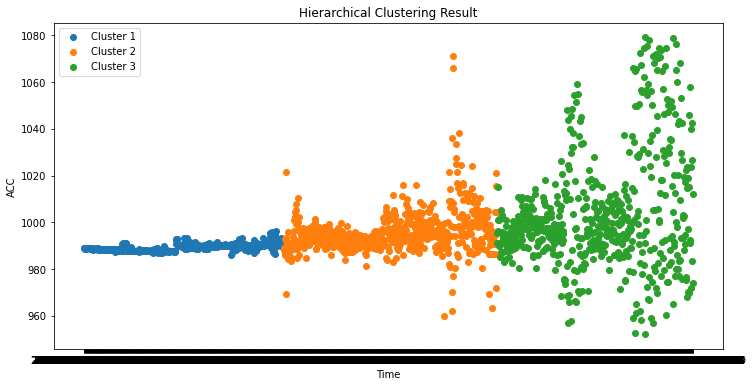

In [27]:
num_clusters = 3 
cluster_labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
data3['Cluster'] = cluster_labels
cluster_data = {}
for cluster_num in range(1, num_clusters + 1):
    cluster_data[cluster_num] = data3[data3['Cluster'] == cluster_num]
plt.figure(figsize=(12, 6))
for cluster_num, cluster_df in cluster_data.items():
    plt.scatter(cluster_df['Time'], cluster_df['ACC'], label=f'Cluster {cluster_num}')
plt.xlabel('Time')
plt.ylabel('ACC')
plt.legend()
plt.title('Hierarchical Clustering Result')
plt.show()


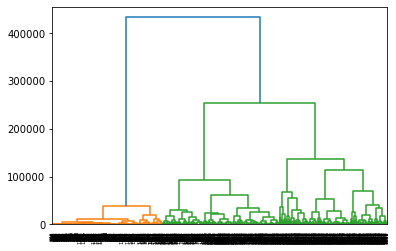

In [28]:
linkage_matrix = sch.linkage(X_pca, method='ward')  # You can choose a different linkage method if needed
dendrogram = sch.dendrogram(linkage_matrix)
plt.show()


In [29]:
df=pd.read_csv("dataset\labels.csv")
df

,Unnamed: 0,0,1
0,0,21981,1
1,1,21973,1
2,2,21992,1
3,3,21968,1
4,4,21984,1
...,...,...,...
194995,194995,22891,2
194996,194996,22856,2
194997,194997,22859,2
194998,194998,22930,2


In [30]:
df.columns

Index(['Unnamed: 0', '0', '1'], dtype='object')

In [31]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,0,1
0,21981,1
1,21973,1
2,21992,1
3,21968,1
4,21984,1
...,...,...
194995,22891,2
194996,22856,2
194997,22859,2
194998,22930,2


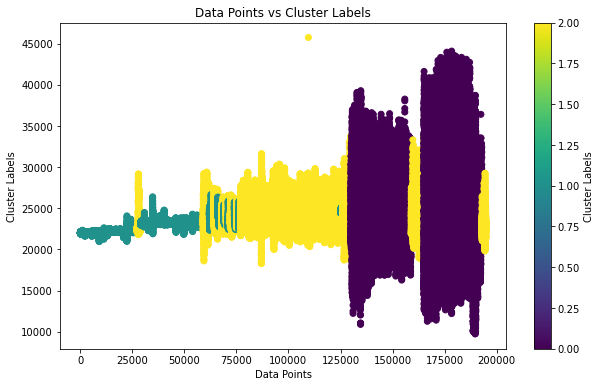

In [32]:
data_points = df['0']
cluster_labels = df['1']
x_axis=np.arange(1,len(data_points)+1)
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_axis,data_points , c=cluster_labels, cmap='viridis')
plt.xlabel('Data Points')
plt.ylabel('Cluster Labels')
plt.title('Data Points vs Cluster Labels')
plt.colorbar(label='Cluster Labels')
plt.show()
